# Market Prediction and Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
df=pd.read_csv('XAUUSD_Historical_Data.csv')
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2015.11.09,1090.33,1095.59,1088.31,1091.95,90911,61816823,24
1,2015.11.10,1092.27,1094.79,1085.22,1089.60,78402,53572570,24
2,2015.11.11,1089.88,1093.58,1083.63,1085.84,81301,55593287,24
3,2015.11.12,1086.50,1089.52,1074.08,1084.90,100179,66398338,24
4,2015.11.13,1085.00,1088.54,1079.57,1083.54,112851,75949073,24


In [2]:
df.tail()

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
1542,2021.11.01,1783.36,1795.79,1779.12,1793.20,88126,0,5
1543,2021.11.02,1792.82,1796.40,1786.41,1787.84,80400,0,5
1544,2021.11.03,1787.63,1788.20,1758.07,1769.89,95424,0,5
1545,2021.11.04,1771.35,1798.90,1770.86,1791.71,89121,0,5
1546,2021.11.05,1791.11,1818.27,1785.10,1817.84,98757,0,5


In [3]:
df1=df.reset_index()['CLOSE']
df1

0       1091.95
1       1089.60
2       1085.84
3       1084.90
4       1083.54
         ...   
1542    1793.20
1543    1787.84
1544    1769.89
1545    1791.71
1546    1817.84
Name: CLOSE, Length: 1547, dtype: float64

Text(0, 0.5, 'Close Price USD ($)')

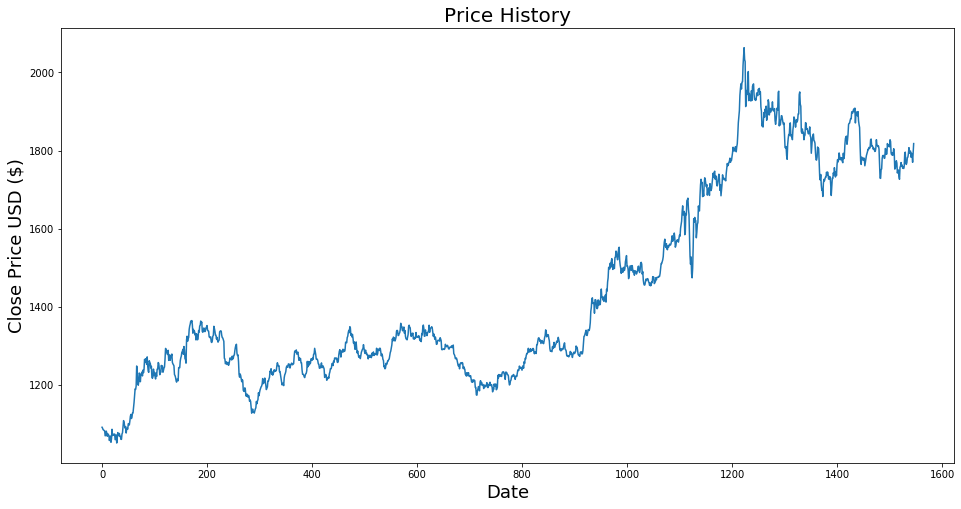

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Price History',fontsize=20)
plt.plot(df1)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)

## LSTM are sensitive to the scale of the data. so we apply MinMax scaler.

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

print(df1)

[[0.03993279]
 [0.03760996]
 [0.03389345]
 ...
 [0.71003262]
 [0.73160028]
 [0.75742809]]


## Splitting dataset into train and test split

In [6]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

training_size,test_size

(1005, 542)

In [7]:
train_data

array([[0.03993279],
       [0.03760996],
       [0.03389345],
       ...,
       [0.43991302],
       [0.41587427],
       [0.42288228]])

## Convert an array of values into a dataset matrix

In [8]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

## Reshape into X = t, t+1, t+2, t+3 and Y=t+4

In [9]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(904, 100)
(904,)


(None, None)

In [11]:
print(X_test.shape), print(ytest.shape)

(441, 100)
(441,)


(None, None)

## Reshape input to be [samples, time steps, features] which is required for LSTM

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

X_train, X_test

(array([[[0.03993279],
         [0.03760996],
         [0.03389345],
         ...,
         [0.16782643],
         [0.18698231],
         [0.17091035]],
 
        [[0.03760996],
         [0.03389345],
         [0.03296432],
         ...,
         [0.18698231],
         [0.17091035],
         [0.17879806]],
 
        [[0.03389345],
         [0.03296432],
         [0.03162005],
         ...,
         [0.17091035],
         [0.17879806],
         [0.16863695]],
 
        ...,
 
        [[0.22916873],
         [0.23140259],
         [0.24536918],
         ...,
         [0.465128  ],
         [0.47407334],
         [0.44686172]],
 
        [[0.23140259],
         [0.24536918],
         [0.24237422],
         ...,
         [0.47407334],
         [0.44686172],
         [0.44777108]],
 
        [[0.24536918],
         [0.24237422],
         [0.24196896],
         ...,
         [0.44686172],
         [0.44777108],
         [0.43991302]]]),
 array([[[0.44318474],
         [0.44803796],
         

## Create the Stacked LSTM model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Training Data

In [14]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 224ms/step - loss: 0.0156 - val_loss: 0.1239
Epoch 2/100
15/15 [==============================] - 2s 160ms/step - loss: 0.0026 - val_loss: 0.0470
Epoch 3/100
15/15 [==============================] - 2s 159ms/step - loss: 0.0015 - val_loss: 0.0178
Epoch 4/100
15/15 [==============================] - 2s 161ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 5/100
15/15 [==============================] - 2s 160ms/step - loss: 7.5953e-04 - val_loss: 0.0078
Epoch 6/100
15/15 [==============================] - 2s 155ms/step - loss: 7.4541e-04 - val_loss: 0.0063
Epoch 7/100
15/15 [==============================] - 2s 149ms/step - loss: 6.9263e-04 - val_loss: 0.0029
Epoch 8/100
15/15 [==============================] - 2s 151ms/step - loss: 6.7509e-04 - val_loss: 0.0058
Epoch 9/100
15/15 [==============================] - 2s 154ms/step - loss: 6.4741e-04 - val_loss: 0.0039
Epoch 10/100
15/15 [==============================] - 2s 150ms/step - l

## Lets Do the prediction and check performance metrics

In [15]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict, test_predict

(array([[0.18085347],
        [0.18454269],
        [0.18432544],
        [0.17984761],
        [0.1790483 ],
        [0.17819984],
        [0.1827792 ],
        [0.18895249],
        [0.19893546],
        [0.20716022],
        [0.2074318 ],
        [0.19785044],
        [0.18880185],
        [0.18329622],
        [0.18697833],
        [0.19254744],
        [0.19852203],
        [0.19778614],
        [0.19509979],
        [0.19466428],
        [0.19647436],
        [0.20525926],
        [0.22409137],
        [0.2412515 ],
        [0.24905726],
        [0.24655837],
        [0.23920839],
        [0.2360984 ],
        [0.22764353],
        [0.22020464],
        [0.2202768 ],
        [0.2198758 ],
        [0.22255364],
        [0.2263857 ],
        [0.23140676],
        [0.2278765 ],
        [0.21959874],
        [0.21133693],
        [0.20508504],
        [0.19459148],
        [0.1844677 ],
        [0.1766817 ],
        [0.17018537],
        [0.16501522],
        [0.16436674],
        [0

## Transformback to original form

In [16]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

train_predict, test_predict

(array([[1234.5194],
        [1238.2518],
        [1238.0321],
        [1233.5018],
        [1232.6931],
        [1231.8348],
        [1236.4677],
        [1242.7131],
        [1252.813 ],
        [1261.134 ],
        [1261.4087],
        [1251.7153],
        [1242.5609],
        [1236.9907],
        [1240.716 ],
        [1246.3502],
        [1252.3948],
        [1251.6501],
        [1248.9325],
        [1248.4918],
        [1250.323 ],
        [1259.2108],
        [1278.2633],
        [1295.6241],
        [1303.5212],
        [1300.9932],
        [1293.557 ],
        [1290.4108],
        [1281.8569],
        [1274.3309],
        [1274.404 ],
        [1273.9983],
        [1276.7075],
        [1280.5845],
        [1285.6643],
        [1282.0927],
        [1273.718 ],
        [1265.3596],
        [1259.0345],
        [1248.4182],
        [1238.1759],
        [1230.299 ],
        [1223.7264],
        [1218.4958],
        [1217.8398],
        [1219.031 ],
        [1220.0079],
        [1230

## Calculate RMSE performance metrics

In [17]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1295.9199090588522

## Test Data RMSE

In [18]:
math.sqrt(mean_squared_error(ytest,test_predict))

1826.654762953562

## Plotting

### Shift train predictions for plotting

In [19]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

### Shift test predictions for plotting

In [20]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

### Plot baseline and predictions

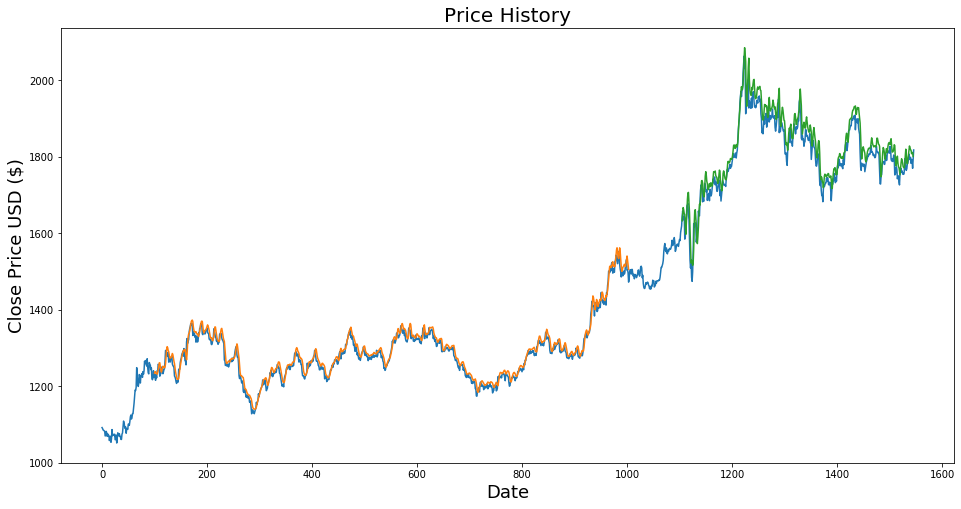

In [29]:
plt.figure(figsize=(16,8))
plt.title('Price History',fontsize=20)
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [22]:
len(test_data)

542

In [23]:
x_input=test_data[(len(test_data)-200):].reshape(1,-1)
x_input.shape

(1, 200)

In [24]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

[0.7868340417119699,
 0.7996441632895126,
 0.777008994761293,
 0.7736087773055254,
 0.7329939705446278,
 0.7530394385687458,
 0.7695759612533362,
 0.7769991104082239,
 0.7816546407037659,
 0.7649698527231394,
 0.7636848868241575,
 0.7582979144015025,
 0.7344173173865771,
 0.7167638628051796,
 0.715518434318474,
 0.7230404270040527,
 0.7487298606306216,
 0.7448057724621924,
 0.7450627656419888,
 0.7103884550756154,
 0.6743995255510526,
 0.6654541860235248,
 0.679272511614115,
 0.652525452209153,
 0.6395670653355738,
 0.6417020855984976,
 0.6236829099535435,
 0.6563605811999604,
 0.6669763763961649,
 0.6630720569338739,
 0.6675595532272414,
 0.6726895324700999,
 0.6724325392903034,
 0.6849757833349808,
 0.6770188791143621,
 0.6855688445191264,
 0.6791835524364931,
 0.6675299001680342,
 0.6743896411979835,
 0.6676188593456558,
 0.6732727093011763,
 0.6526242957398438,
 0.6261836512800236,
 0.6485618266284472,
 0.6700998319659979,
 0.6689829000691905,
 0.6835128990807551,
 0.67808638924582

## Demonstrate prediction for next 10 days

In [25]:
from numpy import array

lst_output=[]
n_steps=len(temp_input)-1
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.79964416 0.77700899 0.77360878 0.73299397 0.75303944 0.76957596
 0.77699911 0.78165464 0.76496985 0.76368489 0.75829791 0.73441732
 0.71676386 0.71551843 0.72304043 0.74872986 0.74480577 0.74506277
 0.71038846 0.67439953 0.66545419 0.67927251 0.65252545 0.63956707
 0.64170209 0.62368291 0.65636058 0.66697638 0.66307206 0.66755955
 0.67268953 0.67243254 0.68497578 0.67701888 0.68556884 0.67918355
 0.6675299  0.67438964 0.66761886 0.67327271 0.6526243  0.62618365
 0.64856183 0.67009983 0.6689829  0.6835129  0.67808639 0.69644163
 0.68390827 0.67291687 0.68581595 0.67678165 0.70371652 0.71673421
 0.71091233 0.71859247 0.73378472 0.72433528 0.71654641 0.72139962
 0.71676386 0.7214787  0.71239498 0.70912326 0.7329149  0.71931403
 0.72759711 0.75483839 0.77028763 0.7749234  0.77616882 0.7557181
 0.76641297 0.78186221 0.80567362 0.80862904 0.80913314 0.81618069
 0.82058911 0.82020362 0.83782742 0.83517841 0.83510922 0.84178116
 0.84518138 0.83850944 0.84719779 0.80967678 0.8302

4 day output [[0.8585006]]
5 day input [0.76957596 0.77699911 0.78165464 0.76496985 0.76368489 0.75829791
 0.73441732 0.71676386 0.71551843 0.72304043 0.74872986 0.74480577
 0.74506277 0.71038846 0.67439953 0.66545419 0.67927251 0.65252545
 0.63956707 0.64170209 0.62368291 0.65636058 0.66697638 0.66307206
 0.66755955 0.67268953 0.67243254 0.68497578 0.67701888 0.68556884
 0.67918355 0.6675299  0.67438964 0.66761886 0.67327271 0.6526243
 0.62618365 0.64856183 0.67009983 0.6689829  0.6835129  0.67808639
 0.69644163 0.68390827 0.67291687 0.68581595 0.67678165 0.70371652
 0.71673421 0.71091233 0.71859247 0.73378472 0.72433528 0.71654641
 0.72139962 0.71676386 0.7214787  0.71239498 0.70912326 0.7329149
 0.71931403 0.72759711 0.75483839 0.77028763 0.7749234  0.77616882
 0.7557181  0.76641297 0.78186221 0.80567362 0.80862904 0.80913314
 0.81618069 0.82058911 0.82020362 0.83782742 0.83517841 0.83510922
 0.84178116 0.84518138 0.83850944 0.84719779 0.80967678 0.83024612
 0.83743205 0.8317782  0.

9 day input [0.76368489 0.75829791 0.73441732 0.71676386 0.71551843 0.72304043
 0.74872986 0.74480577 0.74506277 0.71038846 0.67439953 0.66545419
 0.67927251 0.65252545 0.63956707 0.64170209 0.62368291 0.65636058
 0.66697638 0.66307206 0.66755955 0.67268953 0.67243254 0.68497578
 0.67701888 0.68556884 0.67918355 0.6675299  0.67438964 0.66761886
 0.67327271 0.6526243  0.62618365 0.64856183 0.67009983 0.6689829
 0.6835129  0.67808639 0.69644163 0.68390827 0.67291687 0.68581595
 0.67678165 0.70371652 0.71673421 0.71091233 0.71859247 0.73378472
 0.72433528 0.71654641 0.72139962 0.71676386 0.7214787  0.71239498
 0.70912326 0.7329149  0.71931403 0.72759711 0.75483839 0.77028763
 0.7749234  0.77616882 0.7557181  0.76641297 0.78186221 0.80567362
 0.80862904 0.80913314 0.81618069 0.82058911 0.82020362 0.83782742
 0.83517841 0.83510922 0.84178116 0.84518138 0.83850944 0.84719779
 0.80967678 0.83024612 0.83743205 0.8317782  0.82765642 0.8382821
 0.81507364 0.80533755 0.79800336 0.74988633 0.71288

13 day output [[0.9740456]]
14 day input [0.72304043 0.74872986 0.74480577 0.74506277 0.71038846 0.67439953
 0.66545419 0.67927251 0.65252545 0.63956707 0.64170209 0.62368291
 0.65636058 0.66697638 0.66307206 0.66755955 0.67268953 0.67243254
 0.68497578 0.67701888 0.68556884 0.67918355 0.6675299  0.67438964
 0.66761886 0.67327271 0.6526243  0.62618365 0.64856183 0.67009983
 0.6689829  0.6835129  0.67808639 0.69644163 0.68390827 0.67291687
 0.68581595 0.67678165 0.70371652 0.71673421 0.71091233 0.71859247
 0.73378472 0.72433528 0.71654641 0.72139962 0.71676386 0.7214787
 0.71239498 0.70912326 0.7329149  0.71931403 0.72759711 0.75483839
 0.77028763 0.7749234  0.77616882 0.7557181  0.76641297 0.78186221
 0.80567362 0.80862904 0.80913314 0.81618069 0.82058911 0.82020362
 0.83782742 0.83517841 0.83510922 0.84178116 0.84518138 0.83850944
 0.84719779 0.80967678 0.83024612 0.83743205 0.8317782  0.82765642
 0.8382821  0.81507364 0.80533755 0.79800336 0.74988633 0.7128892
 0.70472472 0.72323811 

18 day output [[1.0688581]]
19 day input [0.67439953 0.66545419 0.67927251 0.65252545 0.63956707 0.64170209
 0.62368291 0.65636058 0.66697638 0.66307206 0.66755955 0.67268953
 0.67243254 0.68497578 0.67701888 0.68556884 0.67918355 0.6675299
 0.67438964 0.66761886 0.67327271 0.6526243  0.62618365 0.64856183
 0.67009983 0.6689829  0.6835129  0.67808639 0.69644163 0.68390827
 0.67291687 0.68581595 0.67678165 0.70371652 0.71673421 0.71091233
 0.71859247 0.73378472 0.72433528 0.71654641 0.72139962 0.71676386
 0.7214787  0.71239498 0.70912326 0.7329149  0.71931403 0.72759711
 0.75483839 0.77028763 0.7749234  0.77616882 0.7557181  0.76641297
 0.78186221 0.80567362 0.80862904 0.80913314 0.81618069 0.82058911
 0.82020362 0.83782742 0.83517841 0.83510922 0.84178116 0.84518138
 0.83850944 0.84719779 0.80967678 0.83024612 0.83743205 0.8317782
 0.82765642 0.8382821  0.81507364 0.80533755 0.79800336 0.74988633
 0.7128892  0.70472472 0.72323811 0.71867154 0.7184442  0.71504399
 0.72112286 0.71906692 

23 day output [[1.1504446]]
24 day input [0.64170209 0.62368291 0.65636058 0.66697638 0.66307206 0.66755955
 0.67268953 0.67243254 0.68497578 0.67701888 0.68556884 0.67918355
 0.6675299  0.67438964 0.66761886 0.67327271 0.6526243  0.62618365
 0.64856183 0.67009983 0.6689829  0.6835129  0.67808639 0.69644163
 0.68390827 0.67291687 0.68581595 0.67678165 0.70371652 0.71673421
 0.71091233 0.71859247 0.73378472 0.72433528 0.71654641 0.72139962
 0.71676386 0.7214787  0.71239498 0.70912326 0.7329149  0.71931403
 0.72759711 0.75483839 0.77028763 0.7749234  0.77616882 0.7557181
 0.76641297 0.78186221 0.80567362 0.80862904 0.80913314 0.81618069
 0.82058911 0.82020362 0.83782742 0.83517841 0.83510922 0.84178116
 0.84518138 0.83850944 0.84719779 0.80967678 0.83024612 0.83743205
 0.8317782  0.82765642 0.8382821  0.81507364 0.80533755 0.79800336
 0.74988633 0.7128892  0.70472472 0.72323811 0.71867154 0.7184442
 0.71504399 0.72112286 0.71906692 0.7013245  0.70979539 0.71658594
 0.72727093 0.73162005 

28 day output [[1.2430671]]
29 day input [0.66755955 0.67268953 0.67243254 0.68497578 0.67701888 0.68556884
 0.67918355 0.6675299  0.67438964 0.66761886 0.67327271 0.6526243
 0.62618365 0.64856183 0.67009983 0.6689829  0.6835129  0.67808639
 0.69644163 0.68390827 0.67291687 0.68581595 0.67678165 0.70371652
 0.71673421 0.71091233 0.71859247 0.73378472 0.72433528 0.71654641
 0.72139962 0.71676386 0.7214787  0.71239498 0.70912326 0.7329149
 0.71931403 0.72759711 0.75483839 0.77028763 0.7749234  0.77616882
 0.7557181  0.76641297 0.78186221 0.80567362 0.80862904 0.80913314
 0.81618069 0.82058911 0.82020362 0.83782742 0.83517841 0.83510922
 0.84178116 0.84518138 0.83850944 0.84719779 0.80967678 0.83024612
 0.83743205 0.8317782  0.82765642 0.8382821  0.81507364 0.80533755
 0.79800336 0.74988633 0.7128892  0.70472472 0.72323811 0.71867154
 0.7184442  0.71504399 0.72112286 0.71906692 0.7013245  0.70979539
 0.71658594 0.72727093 0.73162005 0.73687852 0.74334289 0.74211723
 0.74774143 0.74589305 

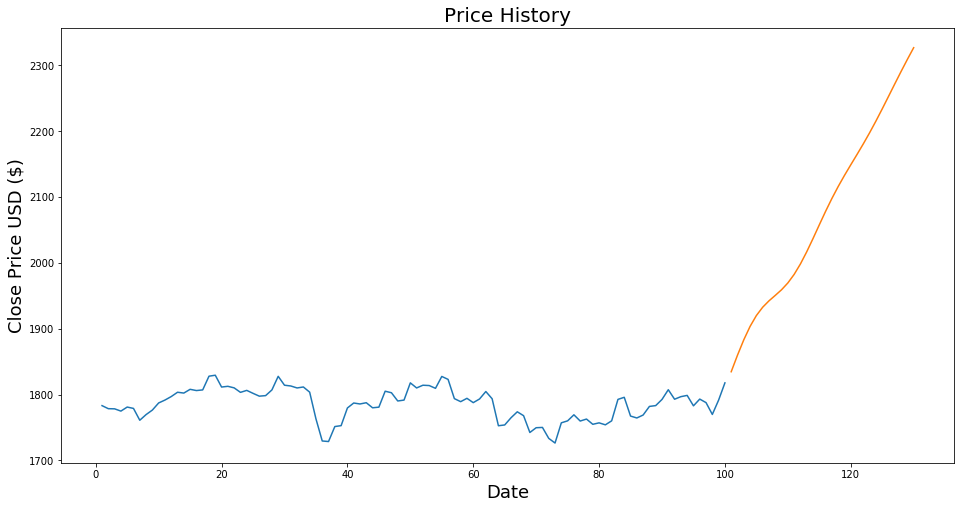

In [31]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('Price History',fontsize=20)
plt.plot(day_new,scaler.inverse_transform(df1[(len(df1)-100):]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()


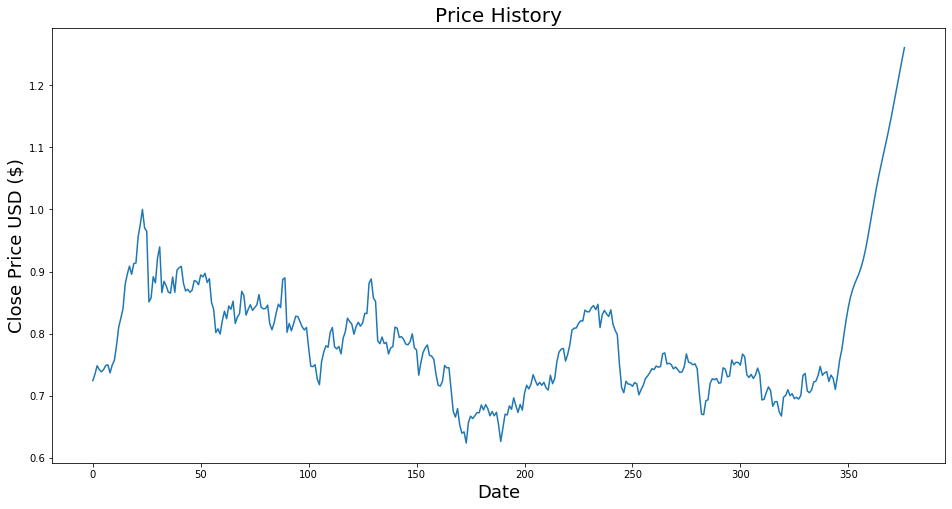

In [40]:
plt.figure(figsize=(16,8))
plt.title('Price History',fontsize=20)
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

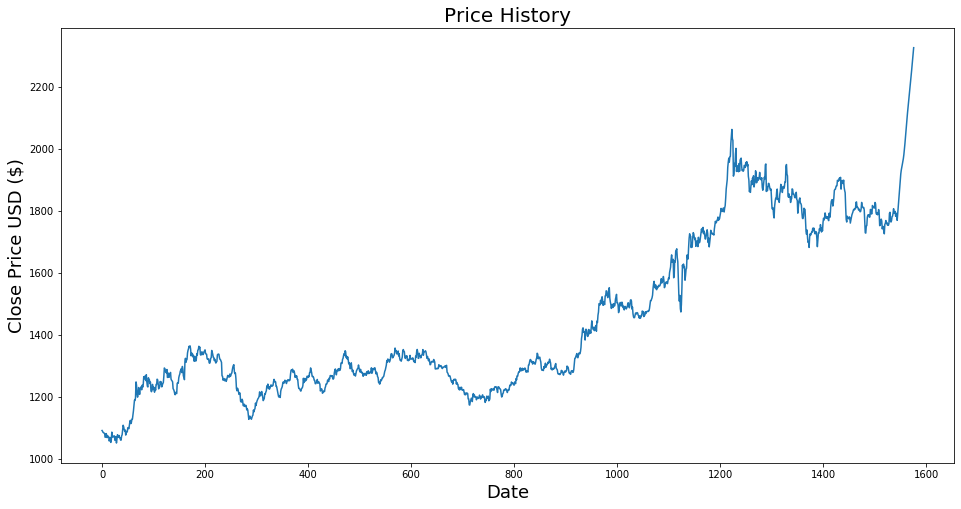

In [34]:
plt.figure(figsize=(16,8))
plt.title('Price History',fontsize=20)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()